In [125]:
import matplotlib.pyplot as plt
import requests
import cv2
import numpy as np

In [136]:
original_image_path = 'sample_img.jpg'
original_image = cv2.imread("sample_img.jpg")
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

In [129]:
url = "http://127.0.0.1:8000/predict"
headers = {
    "accept": "application/json",
    # "Content-Type": "multipart/form-data"
}
files = {
    "file": open(original_image_path, "rb")
}

response = requests.post(url, headers=headers, files=files).json()
print(response)

{'keypoints': [[[147.75, 88.25001525878906, 0.9395121932029724], [155.25, 85.75001525878906, 0.9690135717391968], [142.75, 85.75001525878906, 0.9626153111457825], [162.75, 88.25001525878906, 0.9302574396133423], [135.25, 90.75001525878906, 0.9860975742340088], [172.75, 120.75001525878906, 0.8868911266326904], [122.75, 125.75001525878906, 0.9429524540901184], [190.25, 160.75001525878906, 0.9105214476585388], [122.75, 165.75001525878906, 0.9143587946891785], [197.75, 198.24998474121094, 0.8826608657836914], [125.25, 203.24998474121094, 0.9326798915863037], [172.75, 200.74998474121094, 0.8170939683914185], [142.75, 203.24998474121094, 0.8098276853561401], [172.75, 260.75, 0.6312602758407593], [130.25, 258.25, 0.7826173305511475], [165.25, 300.75, 0.8050580024719238], [105.25, 313.25, 0.7326458692550659]]], 'resized_img': [[[196, 197, 202], [196, 197, 202], [197, 198, 203], [198, 199, 204], [198, 199, 204], [198, 199, 204], [199, 200, 205], [200, 201, 206], [200, 201, 206], [201, 202, 207]

In [132]:
keypoint_boxes, image = np.array(
    response["keypoints"]), np.array(response["resized_img"])
keypoints = keypoint_boxes.reshape(-1, 3)

In [133]:
scale = np.array([original_image.shape[1] / image.shape[1],
                 original_image.shape[0] / image.shape[0]])
keypoints[:, :2] *= scale

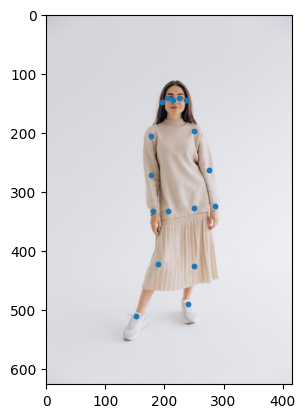

In [137]:
plt.imshow(original_image)
plt.scatter(keypoints[:, 0], keypoints[:, 1], s=10)
plt.show()